### Data Analysis

#### Initial Dependencies

In [46]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# ignore some warnings if dataframe is changing
import warnings
warnings.filterwarnings('ignore')

#### Preview DataFrame

In [47]:
df = pd.read_csv("output_data/cleanup_movie_2019.csv")
df.head()

,Title,Adult,Budget,Production Company,Popularity,Revenue,Production Country,Run Time,Vote Average,Vote Count,...,Genre5,Genre6,Genre7,Rated,Director,Actors,Language,Metascore,IMDB Rating,IMDB Votes
0,Joker,False,55000000.0,"['DC Entertainment', 'Warner Bros. Pictures', ...",601.364,7.883000e+08,['United States of America'],122.0,8.6,4118,...,NaN,NaN,NaN,R,Todd Phillips,"Joaquin Phoenix, Robert De Niro, Zazie Beetz, ...",English,59.0,8.9,"360,218"
1,Maleficent: Mistress of Evil,False,NaN,['Walt Disney Pictures'],257.685,NaN,['United States of America'],118.0,7.2,395,...,NaN,NaN,NaN,PG,Joachim Rønning,"Angelina Jolie, Elle Fanning, Imelda Staunton,...",English,NaN,NaN,NaN
2,Terminator: Dark Fate,False,160000000.0,"['Lightstorm Entertainment', 'Skydance Media',...",223.592,NaN,"['China', 'United States of America']",128.0,6.8,61,...,NaN,NaN,NaN,NaN,Tim Miller,"Linda Hamilton, Arnold Schwarzenegger, Mackenz...",English,NaN,NaN,NaN
3,The Lion King,False,260000000.0,"['Walt Disney Pictures', 'Fairview Entertainme...",180.573,1.649677e+09,['United States of America'],118.0,7.1,3183,...,NaN,NaN,NaN,PG,Jon Favreau,"Chiwetel Ejiofor, John Oliver, James Earl Jone...",English,55.0,7.1,"102,621"
4,Spider-Man: Far from Home,False,160000000.0,"['Marvel Studios', 'Sony Pictures', 'Columbia ...",149.478,1.131450e+09,['United States of America'],129.0,7.6,4656,...,NaN,NaN,NaN,PG-13,Jon Watts,"Tom Holland, Samuel L. Jackson, Jake Gyllenhaa...","Italian, Czech, English",69.0,7.7,"187,214"


In [49]:
#Drop the null values in the subset
set1=["Title","Popularity","Run Time","Vote Average","IMDB Rating","Metascore"]
#Check data 
df_runtime=df[set1].dropna().reset_index(drop=True)
df_runtime.head()

,Title,Popularity,Run Time,Vote Average,IMDB Rating,Metascore
0,Joker,601.364,122.0,8.6,8.9,59.0
1,The Lion King,180.573,118.0,7.1,7.1,55.0
2,Spider-Man: Far from Home,149.478,129.0,7.6,7.7,69.0
3,Fast & Furious Presents: Hobbs & Shaw,117.194,137.0,6.5,6.7,60.0
4,Toy Story 4,105.512,100.0,7.6,8.1,84.0


In [50]:
#Remove the outlier
df_runtime=df_runtime.loc[df_runtime['Popularity']!=df_runtime['Popularity'].max()]

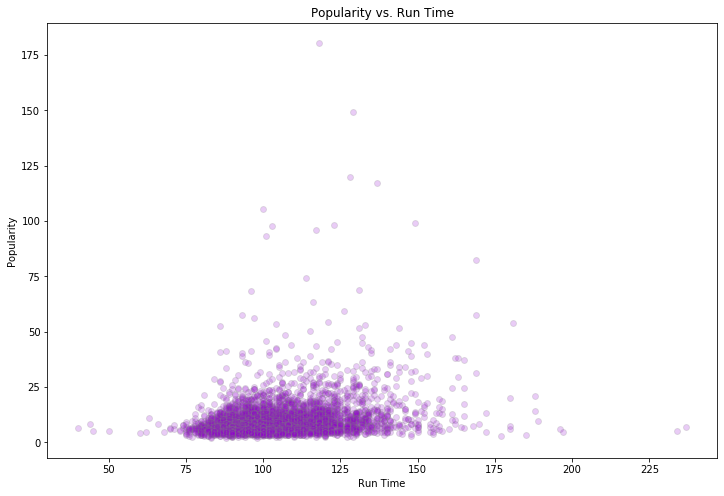

In [51]:
#set axis and tick locations
x_axis=df_runtime["Run Time"]
plt.figure(figsize=(12,8))
plt.scatter(x_axis,df_runtime["Popularity"], facecolor = "darkviolet", edgecolor = "grey", alpha = 0.2)
# Set a Title and labels
plt.title("Popularity vs. Run Time")
plt.xlabel("Run Time")
plt.ylabel("Popularity")
#plt.tight_layout()
plt.savefig("output_data/POPvsRT.png")
plt.show()

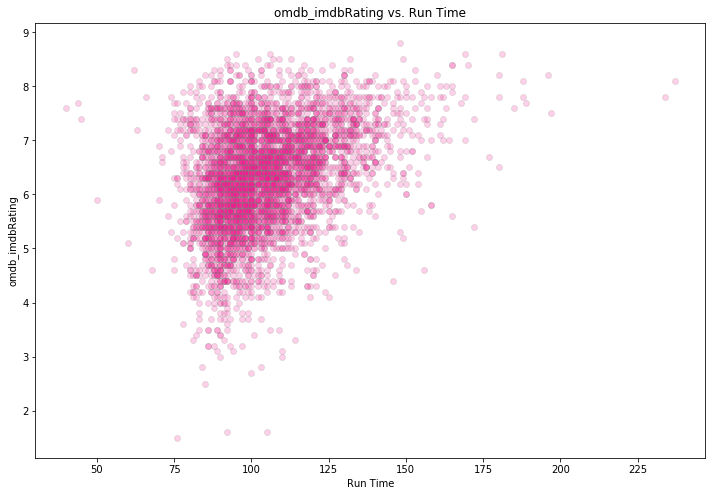

In [53]:
#set axis and tick locations
x_axis=df_runtime["Run Time"]
plt.figure(figsize=(12,8))
plt.scatter(x_axis,df_runtime["IMDB Rating"], facecolor = "deeppink", edgecolor = "grey", alpha = 0.2)
# Set a Title and labels
plt.title("omdb_imdbRating vs. Run Time")
plt.xlabel("Run Time")
plt.ylabel("omdb_imdbRating")
#plt.tight_layout()
plt.savefig("output_data/RatingvsRT.png")
plt.show()

In [14]:
#Drop the null values in the subset
set2=["Title","Genres","omdb_director","omdb_actors","Vote Average","Popularity"]
df_set2=df[set2].dropna().reset_index(drop=True)
df_set2.head()

,Title,Genres,omdb_director,omdb_actors,Vote Average,Popularity
0,Joker,"['Crime', 'Thriller', 'Drama']",Todd Phillips,"Joaquin Phoenix, Robert De Niro, Zazie Beetz, ...",8.6,462.910
1,Maleficent: Mistress of Evil,"['Fantasy', 'Adventure', 'Family']",Joachim Rønning,"Angelina Jolie, Elle Fanning, Imelda Staunton,...",7.1,287.919
2,The Lion King,"['Adventure', 'Animation', 'Drama']",Jon Favreau,"Chiwetel Ejiofor, John Oliver, James Earl Jone...",7.1,183.255
3,Terminator: Dark Fate,"['Action', 'Science Fiction']",Tim Miller,"Linda Hamilton, Arnold Schwarzenegger, Mackenz...",7.4,153.313
4,Spider-Man: Far from Home,"['Action', 'Adventure', 'Science Fiction']",Jon Watts,"Tom Holland, Samuel L. Jackson, Jake Gyllenhaa...",7.6,123.576


In [41]:
#split Genres Columns
genre=df.Genres[0]
#df_set2.Genres.values.tolist()
genre

"['Crime', 'Thriller', 'Drama']"

In [16]:
#split actor columns 
actor=df.omdb_actors.str.split(",")
df_actor=pd.DataFrame(actor.values.tolist())
df_actor.head(1)

TypeError: object of type 'float' has no len()

In [ ]:
#add columns name to actors
df_actor.columns=["Actor 1","Actor 2","Actor 3","Actor 4"]
df_actor.head(1)

In [ ]:
df_actor_a=df[["Title", "Budget","Popularity","Revenue","omdb_director"]]
df_actor_analysis=pd.concat([df_actor_a,df_actor],axis=1)
df_actor_r1=df_actor_analysis.groupby("Actor 1").Revenue.sum().reset_index(name="Revenue 1").set_index('Actor 1')
df_actor_r2=df_actor_analysis.groupby("Actor 2").Revenue.sum().reset_index(name="Revenue 2").set_index('Actor 2')
df_actor_r3=df_actor_analysis.groupby("Actor 3").Revenue.sum().reset_index(name="Revenue 3").set_index('Actor 3')
df_actor_r4=df_actor_analysis.groupby("Actor 4").Revenue.sum().reset_index(name="Revenue 4").set_index('Actor 4')
df_actor_rtotal=pd.concat([df_actor_r1,df_actor_r2,df_actor_r3,df_actor_r4],axis=1)
df_actor_rtotal=df_actor_rtotal.sum(axis=1).reset_index(name="Total Revenue").set_index('index').sort_values(by="Total Revenue",ascending=False)
df_actor_rtotal.index.name=None
df_actor_rtotal.head()